## Evaluating complete dataset (March 2020 - December 2020/Jan 1 2021)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transformar_features = False
data = pd.read_csv('../data_input_zerofill_2018.csv', sep=',', delimiter=',')
# busline_filter = 41
# data_model = data.loc[data['linha'] == busline_filter]
# display(data_model)

In [12]:
print('Quantidade de Linhas de Onibus: ', len(data.linha.unique()))
# data

Quantidade de Linhas de Onibus:  390


## Sazonalidade Anual / Dia

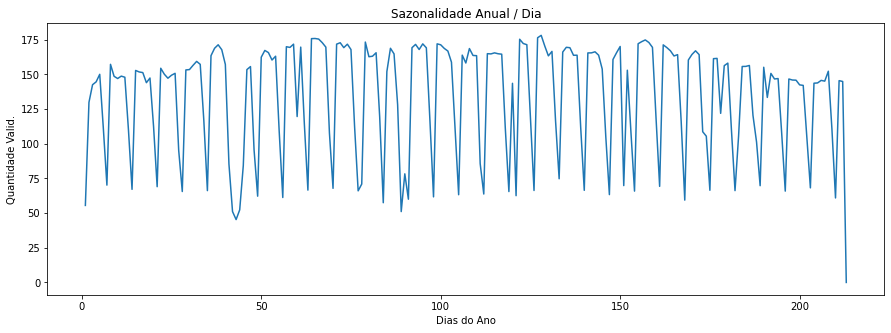

In [13]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Ano')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Anual / Dia")
sns.lineplot(x="d_ano", y="validations_per_hour", data=data, markers=True, dashes=False, ci=None)
#plt.plot(data['d_ano'], data['validations_per_hour'], 'b--')
plt.show()

## Relacao QTD de validacoes Mensais

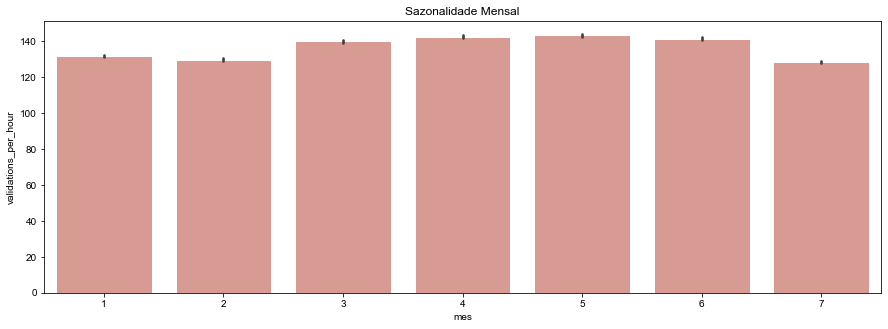

In [14]:
plt.figure(figsize=(15,5))
plt.xlabel('Meses')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Mensal")
sns.set_theme(style="whitegrid")
sns.barplot(x="mes", y="validations_per_hour", data=data, color='salmon', saturation=.5)
#plt.plot(data['mes'], data['validations_per_hour'], kind='bar')
plt.show()

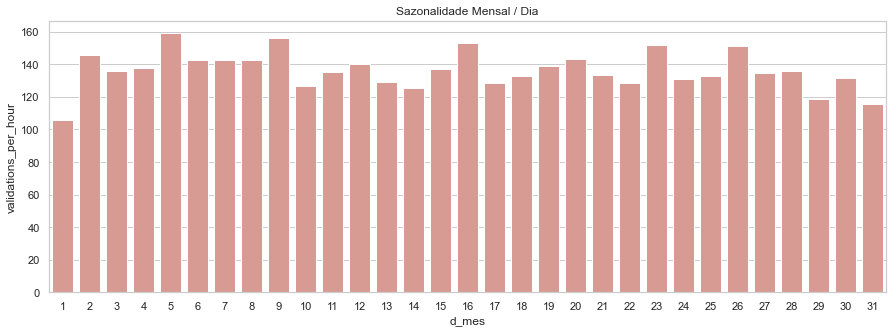

In [15]:

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Mensal / Dia")
sns.barplot(x="d_mes", y="validations_per_hour", data=data, color="salmon", saturation=.5, ci=None)
#plt.plot(data['d_mes'], data['validations_per_hour'], 'b--')
plt.show()

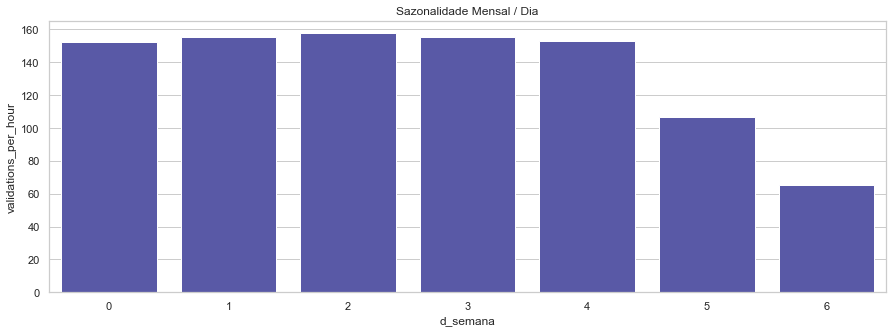

In [16]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Mensal / Dia")
sns.barplot(x='d_semana', y='validations_per_hour', data=data, color="blue", saturation=.3, ci=None)
plt.show()

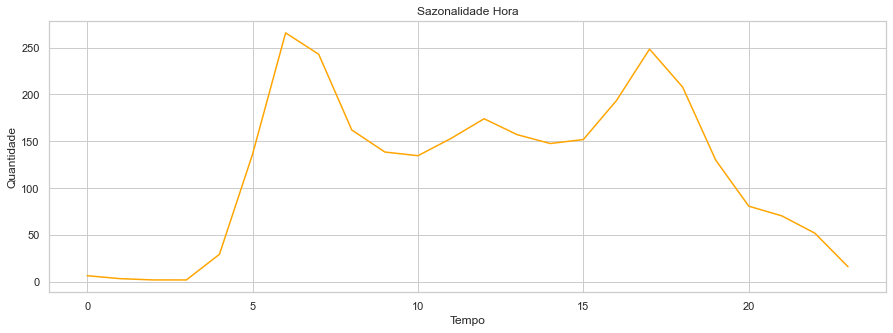

In [20]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data, ci=None, color='orange')
plt.savefig('../images/2018/sazonalidade_hora.pdf')
plt.show()


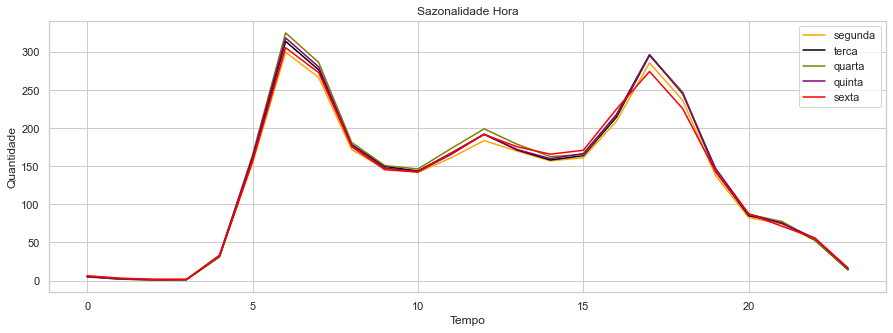

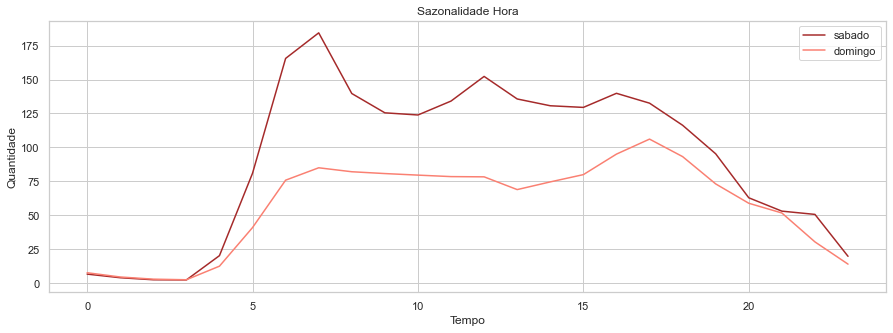

In [ ]:
colors = ['orange', 'red', 'black', 'green', 'purple', 'olive', 'cyan']

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 0], ci=None, color='orange', label='segunda')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 1], ci=None, color='black', label='terca')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 2], ci=None, color='olive', label='quarta')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 3], ci=None, color='purple', label='quinta')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 4], ci=None, color='red', label='sexta')
plt.savefig(f'./images/2018/sazonalidade_hora_diadasemana_diasuteis.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 5], ci=None, color='brown', label='sabado')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 6], ci=None, color='salmon', label='domingo')
plt.savefig(f'./images/2018/sazonalidade_hora_diadasemana_fds.pdf')
plt.show()

## Visualizacao das Linhas

### Ranking (top 10 / 100)
Ranking feito atraves do comparativo entre os 
modelos mais performaticos analisados: (exemplo abaixo feito sob a linha 41)  
- Stacking Regressors  
- RandomForest GridSearched  
- RandomForest Default  
- RandomForest Bagging  
- GradientBoostingRegressor  
- LinearRegression Bagging  
- LinearReg GridSearched  
- LinearReg Default  

In [ ]:
data = pd.read_csv('./performances/2018/ranking_top100.csv', sep=',', delimiter=',')
ranking = data.sort_values('MAE', ascending=True).drop_duplicates(subset=['Linha'])
ranking.head(10)

,Linha,R2,RMSE,MAE
0,325,0.855805,6.237197,3.708476
3,384,0.876705,6.257836,3.903380
8,332,0.819357,7.037291,4.299338
12,619,0.831069,6.610710,4.441423
16,641,0.804414,7.701158,4.666211
20,630,0.902611,8.925873,5.000876
21,304,0.872795,8.485959,5.060620
26,339,0.845717,8.890747,5.270951
28,225,0.847308,10.315144,5.313097
35,356,0.900404,9.234865,5.510715


In [ ]:
data_m = pd.read_csv('../data_input_zerofill_2018.csv', sep=';', delimiter=';')

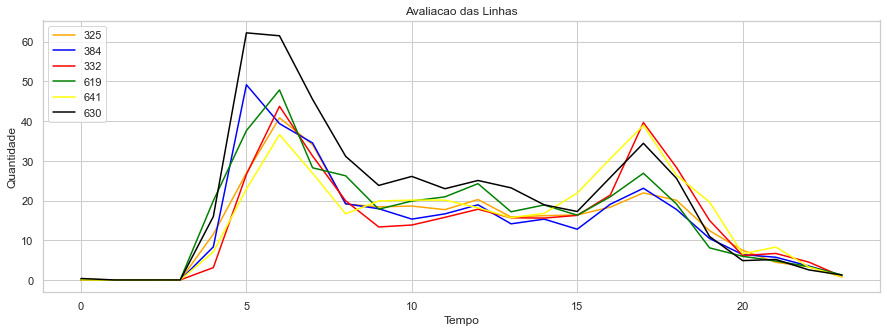

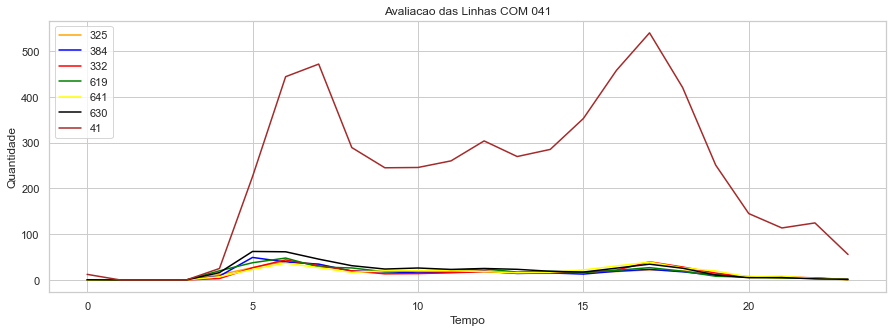

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
# sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas COM 041")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


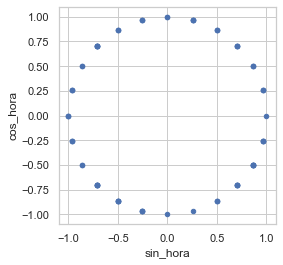

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def rand_times(n):
    """Generate n rows of random 24-hour times (seconds past midnight)"""
    rand_seconds = np.random.randint(0, 24, n)
    return pd.DataFrame(data=dict(seconds=rand_seconds))

n_rows = 1000

df = rand_times(n_rows)
# sort for the sake of graphing
df = df.sort_values('seconds').reset_index(drop=True)
df.head()

seconds_in_day = 24

df['sin_hora'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_hora'] = np.cos(2*np.pi*df.seconds/seconds_in_day)

df.drop('seconds', axis=1, inplace=True)

df.head()

df.sample(80).plot.scatter('sin_hora','cos_hora').set_aspect('equal');


<AxesSubplot:>

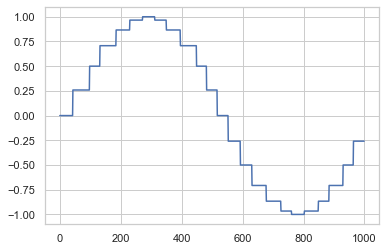

In [ ]:
df.sin_hora.plot()

<AxesSubplot:>

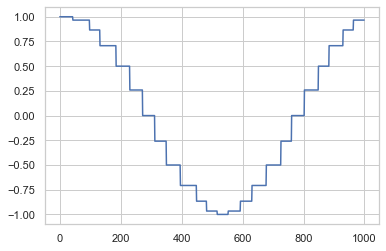

In [ ]:
df.cos_hora.plot()

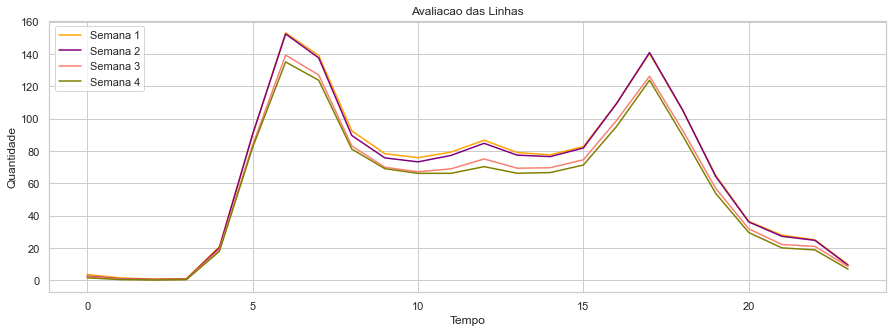

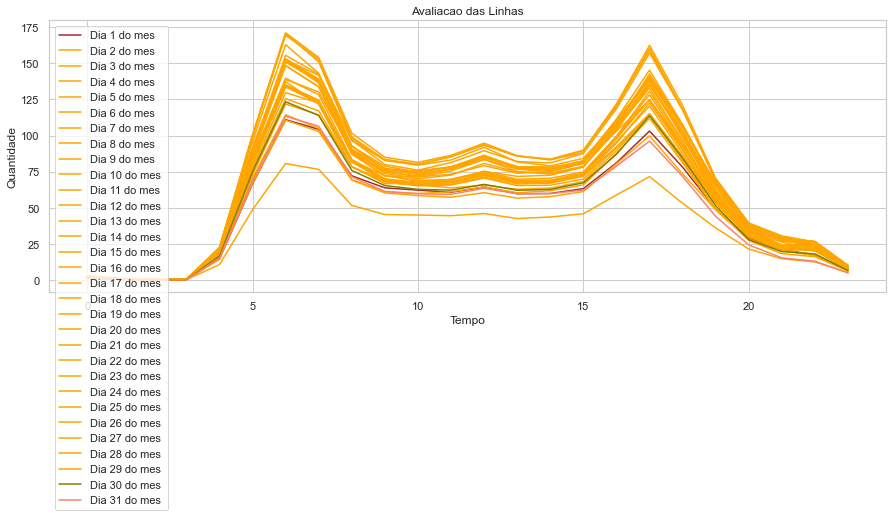

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 1], ci=None, color='orange', label="Semana 1")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 2], ci=None, color='purple', label="Semana 2")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 3], ci=None, color='salmon', label="Semana 3")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 4], ci=None, color='olive', label="Semana 4")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 1], ci=None, color='brown', label=f"Dia 1 do mes ")
for i in range(2, 30):
    sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == i], ci=None, color='orange', label=f"Dia {i} do mes ")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 30], ci=None, color='olive', label=f"Dia 30 do mes ")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 31], ci=None, color='salmon', label=f"Dia 31 do mes ")
plt.legend(loc="upper left")
plt.show()